In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mymoviedb.csv.csv',lineterminator = '\n')

In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [6]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [7]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


In [11]:
import pandas as pd

# Assuming df is already loaded with your data
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='%d-%m-%Y', errors='coerce')


# Print the data type of the column
print(df['Release_Date'].dtype)


datetime64[ns]


In [12]:
df['Release_Date'] = df['Release_Date'] .dt.year


# Print the data type of th  
df['Release_Date'].dtype

dtype('float64')

In [13]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021.0,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022.0,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022.0,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021.0,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021.0,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [14]:
col = ['Overview','Original_Language','Poster_Url']

In [16]:
df.drop(col, axis=1, inplace=True)
print(df.columns)


Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')


In [17]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022.0,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022.0,No Exit,2618.087,122,6.3,Thriller
3,2021.0,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021.0,The King's Man,1895.511,1793,7,"Action, Adventure, Thriller, War"


In [25]:
def categorize_col(df, col, labels):
    df = df.copy()

    df[col] = pd.to_numeric(df[col], errors='coerce')
    df = df.dropna(subset=[col]).copy()

    edges = [
        df[col].min(),
        df[col].quantile(0.25),
        df[col].quantile(0.5),
        df[col].quantile(0.75),
        df[col].max()
    ]
    edges = sorted(set(edges))  # ensure increasing unique values

    df[col] = pd.cut(
        df[col],
        bins=edges,
        labels=labels[:len(edges) - 1],
        duplicates='drop'
    )

    return df



In [29]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
df = categorize_col(df, 'Vote_Average', labels)
print(df['Vote_Average'].unique())


[ 8.3  8.1  6.3  7.7  7.   6.6  6.8  5.3  7.2  5.9  7.3  7.1  5.1  4.6
  6.   8.2  5.4  6.1  8.4  6.9  5.8  7.4  7.8  8.   6.2  6.7  7.6  8.6
  4.8  5.5  7.9  6.4  7.5  5.7  2.2  6.5  0.   5.6  5.2  5.   8.5  3.5
  4.   3.3  4.7  4.2  4.3  2.   4.1  4.9  8.7  4.5  9.1  4.4  3.6  2.8
  3.9  3.8  9.   3.   3.1  3.7  3.4  8.9  2.9  8.8  3.2  1.5  9.2  2.5
  1.8  2.4  2.6 10. ]


In [28]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
0,2021.0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,2022.0,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,2022.0,No Exit,2618.087,122,6.3,Thriller,below_avg
3,2021.0,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,2021.0,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average


In [32]:
df['Vote_Average_Category'].value_counts()

Vote_Average_Category
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [34]:
df.dropna(inplace = True)
df.isna().sum()

Release_Date             0
Title                    0
Popularity               0
Vote_Count               0
Vote_Average             0
Genre                    0
Vote_Average_Category    0
dtype: int64

In [42]:
print(df['Genre'].head(10))
print(df.shape)


Series([], Name: Genre, dtype: object)
(0, 7)


In [44]:
import pandas as pd

df = pd.read_csv("mymoviedb.csv.csv")
print(df.shape)         # Should show more than (0, 7)
print(df.head())        # Confirm actual data is back


(9837, 9)
  Release_Date                    Title  \
0   15-12-2021  Spider-Man: No Way Home   
1   01-03-2022               The Batman   
2   25-02-2022                  No Exit   
3   24-11-2021                  Encanto   
4   22-12-2021           The King's Man   

                                            Overview  Popularity Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954       8940   
1  In his second year of fighting crime, Batman u...    3827.658       1151   
2  Stranded at a rest stop in the mountains durin...    2618.087        122   
3  The tale of an extraordinary family, the Madri...    2402.201       5076   
4  As a collection of history's worst tyrants and...    1895.511       1793   

  Vote_Average Original_Language                               Genre  \
0          8.3                en  Action, Adventure, Science Fiction   
1          8.1                en            Crime, Mystery, Thriller   
2          6.3                en        

In [45]:
print(df['Genre'].head(10))


0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
5               Action, Crime, Thriller
6             Horror, Mystery, Thriller
7                              Thriller
8                Action, Crime, Fantasy
9                       Science Fiction
Name: Genre, dtype: object


In [46]:
df['Genre'] = df['Genre'].astype(str)  # Make sure it's string
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
print(df[['Title', 'Genre']].head(10))  # See exploded genre values


                     Title            Genre
0  Spider-Man: No Way Home           Action
1  Spider-Man: No Way Home        Adventure
2  Spider-Man: No Way Home  Science Fiction
3               The Batman            Crime
4               The Batman          Mystery
5               The Batman         Thriller
6                  No Exit         Thriller
7                  Encanto        Animation
8                  Encanto           Comedy
9                  Encanto           Family


In [47]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western', 'nan'],
, ordered=False, categories_dtype=object)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25803 entries, 0 to 25802
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Release_Date       25803 non-null  object  
 1   Title              25794 non-null  object  
 2   Overview           25794 non-null  object  
 3   Popularity         25793 non-null  float64 
 4   Vote_Count         25793 non-null  object  
 5   Vote_Average       25793 non-null  object  
 6   Original_Language  25793 non-null  object  
 7   Genre              25803 non-null  category
 8   Poster_Url         25792 non-null  object  
dtypes: category(1), float64(1), object(7)
memory usage: 1.6+ MB


In [49]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [50]:
col = ['Overview','Original_Language','Poster_Url']

In [51]:
df.drop(col, axis=1, inplace=True)
print(df.columns)

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')


In [52]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction
3,01-03-2022,The Batman,3827.658,1151,8.1,Crime
4,01-03-2022,The Batman,3827.658,1151,8.1,Mystery


In [53]:
def categorize_col(df, col, labels):
    df = df.copy()

    df[col] = pd.to_numeric(df[col], errors='coerce')
    df = df.dropna(subset=[col]).copy()

    edges = [
        df[col].min(),
        df[col].quantile(0.25),
        df[col].quantile(0.5),
        df[col].quantile(0.75),
        df[col].max()
    ]
    edges = sorted(set(edges))  # ensure increasing unique values

    df[col] = pd.cut(
        df[col],
        bins=edges,
        labels=labels[:len(edges) - 1],
        duplicates='drop'
    )

    return df

In [54]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
df = categorize_col(df, 'Vote_Average', labels)
print(df['Vote_Average'].unique())

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']


In [55]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,15-12-2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,01-03-2022,The Batman,3827.658,1151,popular,Crime
4,01-03-2022,The Batman,3827.658,1151,popular,Mystery


In [56]:
sns.set_style('whitegrid')

In [72]:
df['Genre'].describe()

count     25792
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

C:\Users\shubh\AppData\Local\Temp\ipykernel_11576\2347715807.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.catplot(
C:\Users\shubh\AppData\Local\Temp\ipykernel_11576\2347715807.py:11: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  plot = sns.catplot(


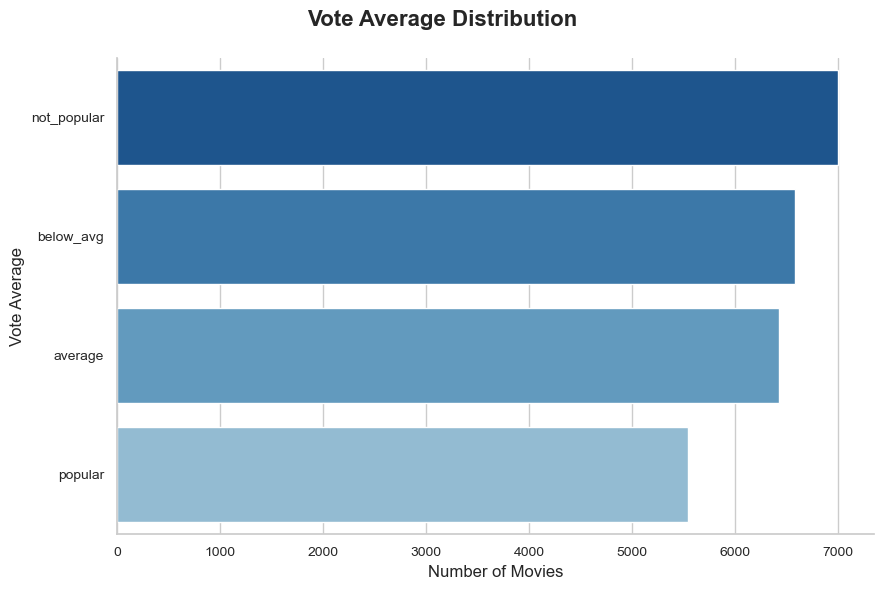

In [70]:
#vote distribution average on netflix

import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme for a cleaner look
sns.set_theme(style="whitegrid")

# Use a colorful palette (optional: "viridis", "coolwarm", etc.)
palette = sns.color_palette("Blues_r")

# Plot using catplot with improved aesthetics
plot = sns.catplot(
    y='Vote_Average',
    data=df,
    kind='count',
    order=df['Vote_Average'].value_counts().sort_index().index,
    palette=palette,
    height=6,
    aspect=1.5,
    legend=False  # Explicitly turn off the legend (if any)
)

# Customize plot titles and labels
plot.fig.suptitle('Vote Average Distribution', fontsize=16, fontweight='bold')
plot.set_xlabels('Number of Movies', fontsize=12)
plot.set_ylabels('Vote Average', fontsize=12)

# Rotate y-axis labels if needed
for ax in plot.axes.flat:
    ax.tick_params(labelsize=10)
    for label in ax.get_yticklabels():
        label.set_rotation(0)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust for title spacing
plt.show()


C:\Users\shubh\AppData\Local\Temp\ipykernel_11576\789863642.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


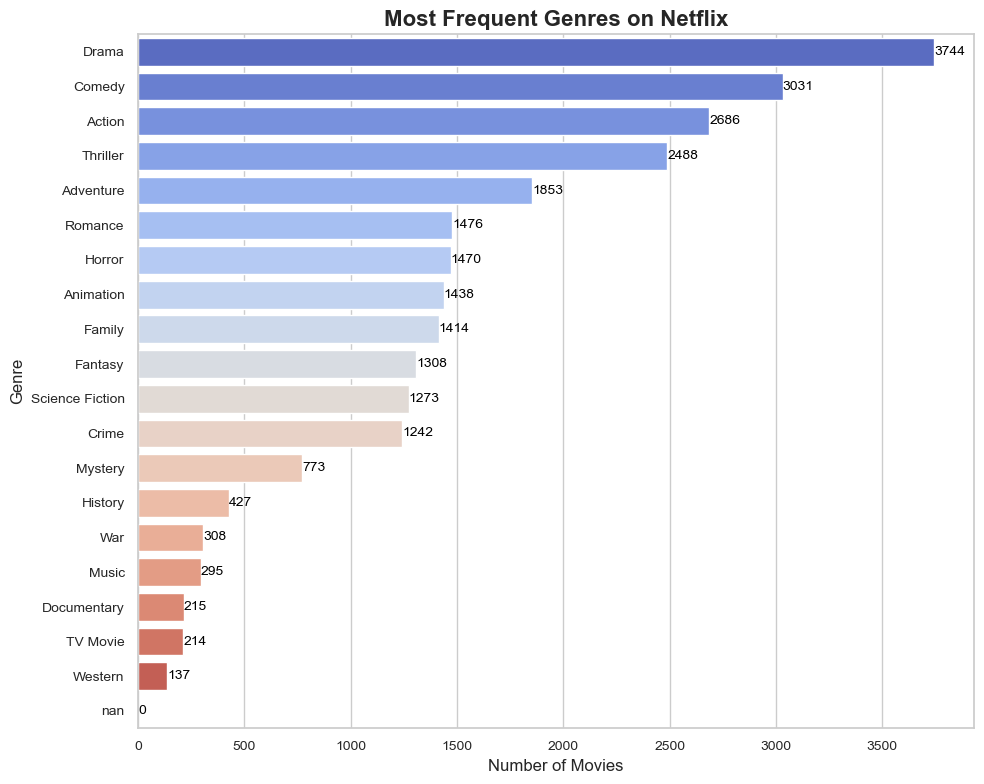

In [73]:
#most frequent release on netflix
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean and modern style
sns.set_theme(style="whitegrid")

# Choose a vibrant palette
palette = sns.color_palette("coolwarm", len(df['Genre'].value_counts()))

# Create the catplot
plt.figure(figsize=(10, 8))
genre_order = df['Genre'].value_counts().index

sns.countplot(
    y='Genre',
    data=df,
    order=genre_order,
    palette=palette
)

# Customize the plot
plt.title('Most Frequent Genres on Netflix', fontsize=16, fontweight='bold')
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add count labels next to bars
for i, v in enumerate(df['Genre'].value_counts()):
    plt.text(v + 1, i, str(v), color='black', va='center', fontsize=10)

# Final layout adjustments
plt.tight_layout()
plt.show()


In [92]:
import pandas as pd

df = pd.read_csv('mymoviedb.csv.csv')
print(df.shape)
print(df.head())


(9837, 9)
  Release_Date                    Title  \
0   15-12-2021  Spider-Man: No Way Home   
1   01-03-2022               The Batman   
2   25-02-2022                  No Exit   
3   24-11-2021                  Encanto   
4   22-12-2021           The King's Man   

                                            Overview  Popularity Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954       8940   
1  In his second year of fighting crime, Batman u...    3827.658       1151   
2  Stranded at a rest stop in the mountains durin...    2618.087        122   
3  The tale of an extraordinary family, the Madri...    2402.201       5076   
4  As a collection of history's worst tyrants and...    1895.511       1793   

  Vote_Average Original_Language                               Genre  \
0          8.3                en  Action, Adventure, Science Fiction   
1          8.1                en            Crime, Mystery, Thriller   
2          6.3                en        

In [93]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


C:\Users\shubh\AppData\Local\Temp\ipykernel_11576\1809746620.py:36: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


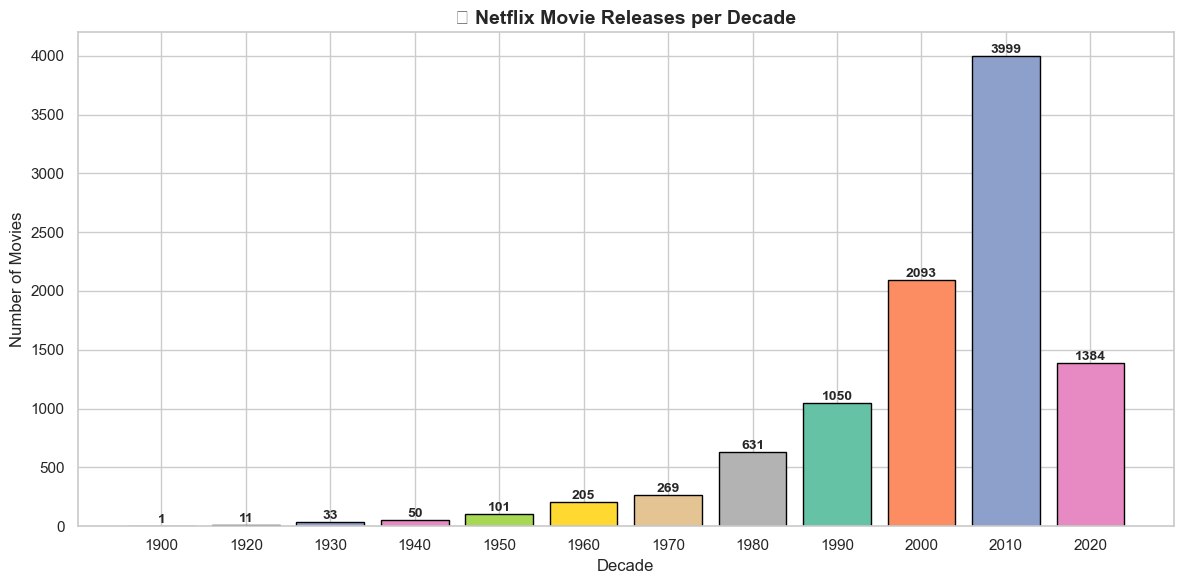

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='%d-%m-%Y', errors='coerce')

# Extract year
df['Release_Year'] = df['Release_Date'].dt.year.dropna().astype('Int64')

# Create 'Decade' column
df['Decade'] = (df['Release_Year'] // 10) * 10

# Count movies by decade
decade_counts = df['Decade'].value_counts().sort_index()

# Generate a colorful palette
colors = sns.color_palette("Set2", n_colors=len(decade_counts))

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(decade_counts.index.astype(str), decade_counts.values, color=colors, edgecolor='black')

# Annotate each bar with count
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title('🎬 Netflix Movie Releases per Decade', fontsize=14, fontweight='bold')
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

plt.tight_layout()
plt.show()


In [104]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year,Decade
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021,2020


In [105]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year,Decade
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...,2021,2020
9836,1984-09-23,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,en,"War, Drama, Science Fiction",https://image.tmdb.org/t/p/original/lBhU4U9Eeh...,1984,1980
